# Indroduction to Survey data Data set

Getting to know Data

2D scatter-plot & 3D Scatter-plot.

Pair plots.

Limitations of Pair plots

Histogram and introduction to PDF(Probability Density Function)

Univariate analysis using PDF.

CDF(Cumulative distribution function)

Variance,Standard Deviation and Median

In [ ]:
 # %%capture
 # !pip3 install matplotlib seaborn pandas plotly

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px 

## Getting to know your data


In [ ]:
file = ('https://cocl.us/datascience_survey_data')
df = pd.read_csv(file)
df

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136
5,Machine Learning,1629,477,74


In [ ]:
df.shape

(6, 4)

In [ ]:
df.head()

,Unnamed: 0,Very interested,Somewhat interested,Not interested
0,Big Data (Spark / Hadoop),1332,729,127
1,Data Analysis / Statistics,1688,444,60
2,Data Journalism,429,1081,610
3,Data Visualization,1340,734,102
4,Deep Learning,1263,770,136


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           6 non-null      object
 1   Very interested      6 non-null      int64 
 2   Somewhat interested  6 non-null      int64 
 3   Not interested       6 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 320.0+ bytes


In [ ]:
df.describe()

,Very interested,Somewhat interested,Not interested
count,6.000000,6.000000,6.000000
mean,1280.166667,705.833333,184.833333
std,451.455166,231.135819,210.344876
min,429.000000,444.000000,60.000000
25%,1280.250000,540.000000,81.000000
50%,1336.000000,731.500000,114.500000
75%,1556.750000,761.000000,133.750000
max,1688.000000,1081.000000,610.000000


In [ ]:
df["Unnamed: 0"].value_counts()

Big Data (Spark / Hadoop)     1
Machine Learning              1
Data Journalism               1
Data Analysis / Statistics    1
Deep Learning                 1
Data Visualization            1
Name: Unnamed: 0, dtype: int64

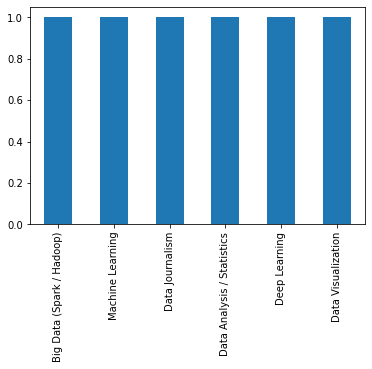

In [ ]:
df["Unnamed: 0"].value_counts().plot.bar()

## Scatter plot (2d and 3d)


In [ ]:
Not interested = df["Not interested"].values
Very interested = df["Very interested"].values

plt.scatter(Not interested, Very interested, s=6, c="green")
plt.title("Not interested vs  Very interested")
plt.xlabel("Not interested")
plt.ylabel("Very interested")
plt.show()

**Even after plotting this values,we still cant find the which data belongs to which **

So lets plot it .

In [ ]:
Data Journalism_Not interested = df["Not interested"][df["Unnamed: 0]] == "Data Journalism"]
Data Journalism_Very interested = df["Very interested"][df["Unnamed: 0]] == "Data Journalism"]

Data Visualisation_Not interested = df["Not interested"][df["Unnamed: 0]] == "Data Visualisation"]
Data Visualisation_Very interested = df["Very interested"][df["Unnamed: 0]] == "Data Visualisation"]

Deep Learning_Not interested = df["Not interested"][df["Unnamed: 0]] == "Deep Learning"]
Deep Learning_Very interested = df["Very interested"][df["Unnamed: 0]] == "Deep Learning"]


In [ ]:
plt.scatter(Data Journalism_Not interested, Data Journalism_Very interested , c="green", label="Data Journalism", marker="^")
plt.scatter(Data Visualisation_Not interested, Data Visualisation_Very interested , c="red", label="Data Visualisation", marker="*")
plt.scatter(Deep Learning_Not interested,Deep Learning_Not interested, c="blue", label="Deep Learning", marker="o")
plt.title("Not interested Vs Very interested")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

Setosa is easily distiguishble, but Not interested and Very interested seems to having so much overlap.

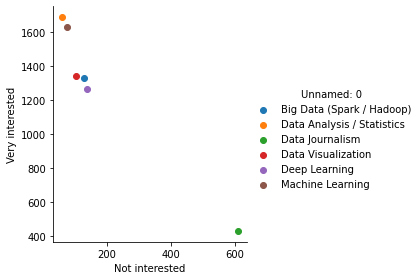

In [ ]:
sns.FacetGrid(df, hue="Unnamed: 0", height=4) \
    .map(plt.scatter, "Not interested", "Very interested") \
    .add_legend()
plt.show()

# 3d Scatter Plot

In [ ]:
px.scatter_3d(df, x="Very interested", y="Somewhat interested", z="Not interested", color=("Unnamed: 0"))

# Pair plots

In [ ]:
from itertools import combinations

def number_of_plots_in_pair_plot(*args):
    combos = list(combinations([*args], 2))
    return combos, len(combos)*2 + len(args)


print(number_of_plots_in_pair_plot("A", "B", "C", "D", "E", "F", "H", "I", "K"))

([('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('A', 'H'), ('A', 'I'), ('A', 'K'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('B', 'F'), ('B', 'H'), ('B', 'I'), ('B', 'K'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('C', 'H'), ('C', 'I'), ('C', 'K'), ('D', 'E'), ('D', 'F'), ('D', 'H'), ('D', 'I'), ('D', 'K'), ('E', 'F'), ('E', 'H'), ('E', 'I'), ('E', 'K'), ('F', 'H'), ('F', 'I'), ('F', 'K'), ('H', 'I'), ('H', 'K'), ('I', 'K')], 81)


KeyError: ignored

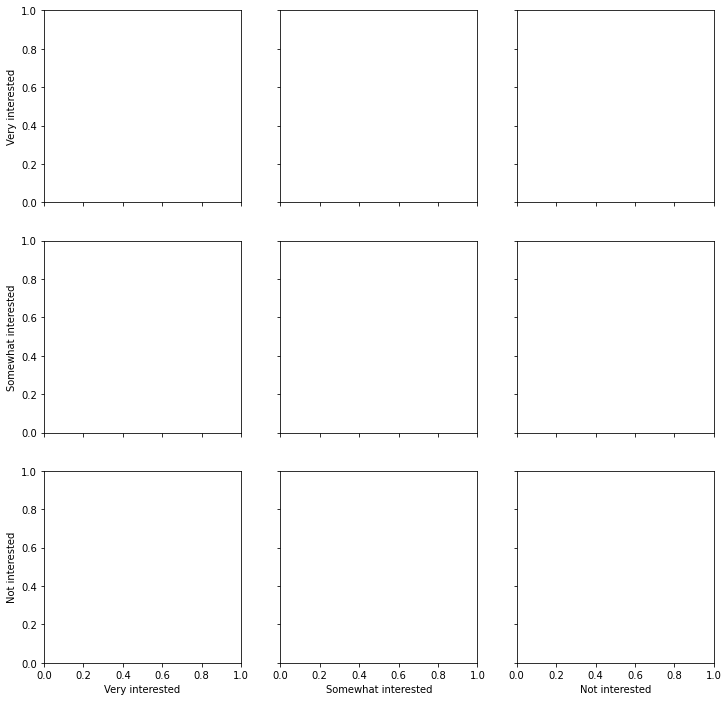

In [ ]:
sns.pairplot(df, hue="Unknown: 0", height=4)
plt.show()

# Limitations of Pair Plots

Doesn't help much when we have a huge number of dimensions.

# Univariate analysis using Histogram

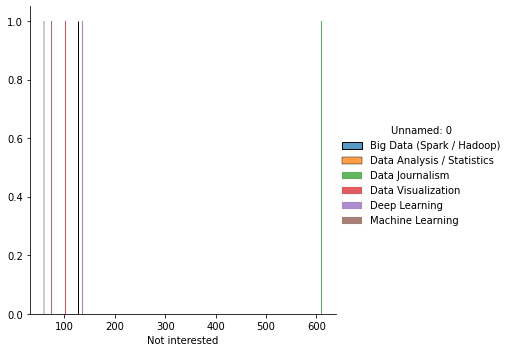

In [ ]:
sns.FacetGrid(df, hue="Unnamed: 0", height=5) \
    .map(sns.histplot, "Not interested") \
    .add_legend()
plt.show()

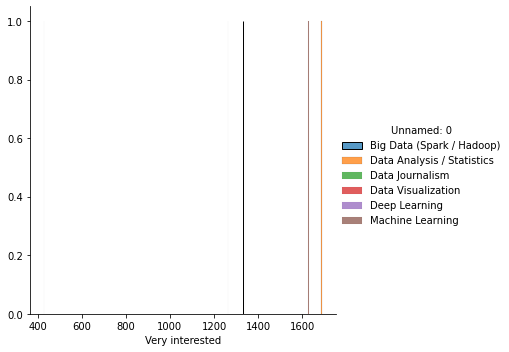

In [ ]:
sns.FacetGrid(df, hue="Unnamed: 0", height=5) \
    .map(sns.histplot, "Very interested") \
    .add_legend()
plt.show()

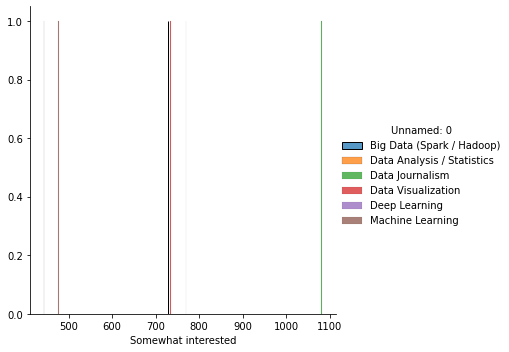

In [ ]:
sns.FacetGrid(df, hue="Unnamed: 0", height=5) \
    .map(sns.histplot, "Somewhat interested") \
    .add_legend()
plt.show()

# Observation

NI<SWI<<VI

# Probability Density Function (PDF)

In [ ]:
print(df['Very interested'].values)
print(np.mean(df['Very interested'].values))
print(np.std(df['Very interested'].values))

[1332 1688  429 1340 1263 1629]
1280.1666666666667
412.1202966233147


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



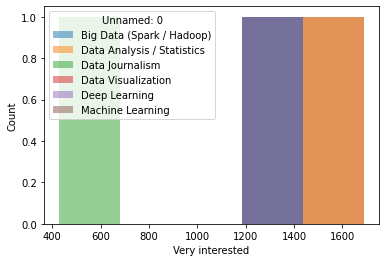

In [ ]:
sns.histplot(df, x=df["Very interested"],hue="Unnamed: 0", kde=True, linewidth=0)
plt.show()

# Cummulative Distributive Function (CDF)

In [ ]:
a = [1, 2, 3, 4]
np.cumsum(a)

array([ 1,  3,  6, 10])

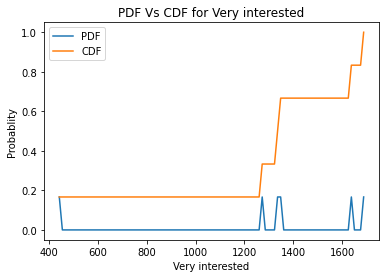

In [ ]:
hist, bins = np.histogram(df["Very interested"], bins=100, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bins[1:] ,pdf, label="PDF")
plt.plot(bins[1:], cdf, label="CDF")
plt.xlabel("Very interested")
plt.ylabel("Probablity")
plt.title(f"PDF Vs CDF for Very interested")
plt.legend(loc="best")
plt.show()

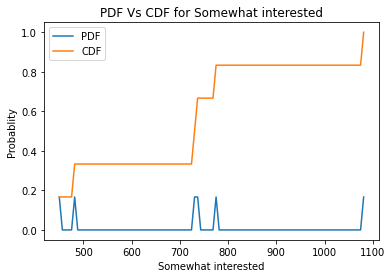

In [ ]:
hist, bins = np.histogram(df["Somewhat interested"], bins=100, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bins[1:] ,pdf, label="PDF")
plt.plot(bins[1:], cdf, label="CDF")
plt.xlabel("Somewhat interested")
plt.ylabel("Probablity")
plt.title(f"PDF Vs CDF for Somewhat interested")
plt.legend(loc="best")
plt.show()

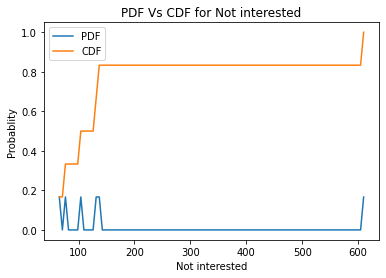

In [ ]:
hist, bins = np.histogram(df["Not interested"], bins=100, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bins[1:] ,pdf, label="PDF")
plt.plot(bins[1:], cdf, label="CDF")
plt.xlabel("Not interested")
plt.ylabel("Probablity")
plt.title(f"PDF Vs CDF for Not interested")
plt.legend(loc="best")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning:

invalid value encountered in true_divide



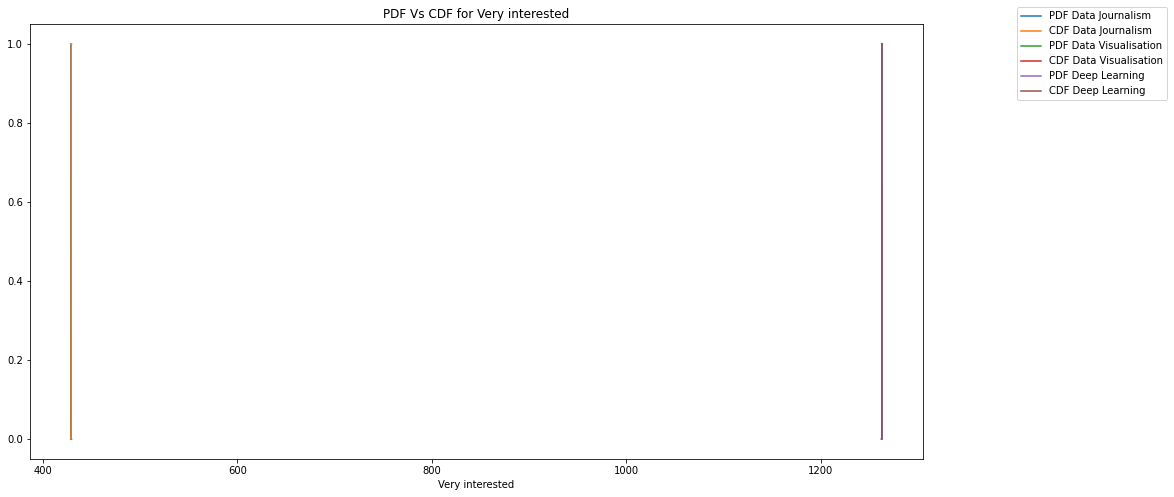

In [ ]:
hist, bins = np.histogram(df["Very interested"][df["Unnamed: 0"] == "Data Journalism"], bins=10, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.figure(figsize=(16, 8))

plt.plot(bins[1:] ,pdf, label="PDF Data Journalism")
plt.plot(bins[1:], cdf, label="CDF Data Journalism")
plt.xlabel("Very interested")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title(f"PDF Vs CDF for Very interested")

hist, bins = np.histogram(df["Very interested"][df["Unnamed: 0"] == "Data Visualisation"], bins=10, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bins[1:] ,pdf, label="PDF Data Visualisation")
plt.plot(bins[1:], cdf, label="CDF Data Visualisation")
plt.xlabel("Very interested")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title(f"PDF Vs CDF for Very interested")


hist, bins = np.histogram(df["Very interested"][df["Unnamed: 0"] == "Deep Learning"], bins=10, density = True)

pdf = hist/(sum(hist))
cdf = np.cumsum(pdf)

plt.plot(bins[1:] ,pdf, label="PDF Deep Learning")
plt.plot(bins[1:], cdf, label="CDF Deep Learning")
plt.xlabel("Very interested")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title(f"PDF Vs CDF for Very interested")

plt.show()

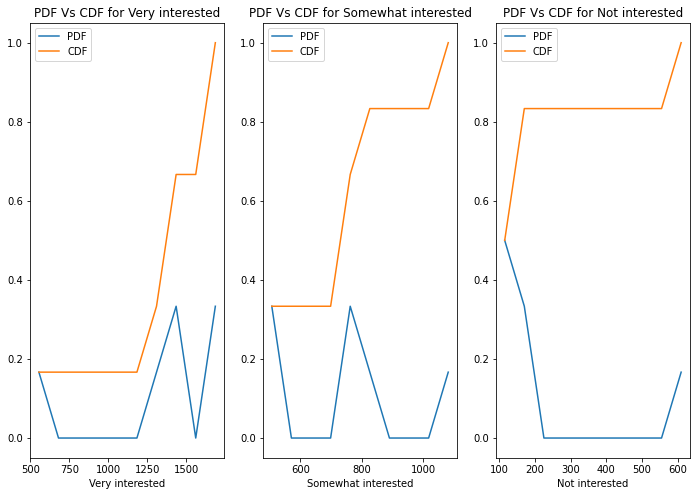

In [ ]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(df.drop("Unnamed: 0", axis=1).columns):
    
    plt.subplot(1, 4, i+1)
    counts, bins = np.histogram(df[col], bins=10, density = True)
    pdf = counts/(sum(counts))

    cdf = np.cumsum(pdf)
    plt.plot(bins[1:] ,pdf, label="PDF")
    plt.plot(bins[1:], cdf, label="CDF")
    plt.xlabel(col)
    plt.title(f"PDF Vs CDF for {col}")
    plt.legend(loc="best")
    
plt.show()

# Mean, Variance, Standard Deviation

                         **Mean= Summation of (xi)/n
                         Variance= Summation of (xi-x)^2/n
                         Standard Deviation= +ve square root of variance **

In [ ]:
survey_data_Data Journalism = df.loc[df["Unnamed: 0"] == "Data Journalism"];
survey_data_Data Visualisation = df.loc[df["Unnamed: 0"] == "Data Visualisation"];
survey_data_Deep Learning = df.loc[df["Unnamed: 0"] == "Deep Learning"];

SyntaxError: ignored

In [ ]:
print("Mean Values")
print(np.mean(survey_data_Data Journalism["Very interested"]))
# With an outlier
print(np.mean(np.append(survey_data_Data Journalism["Very interested"],100)))
print(np.mean(survey_data_Data Visualisation["Very interested"]))
print(np.mean(survey_data_Deep Learning["Very interested"]))

In [ ]:
print("Standard Deviation Values")
print(np.std(survey_data_Data Journalism["Very interested"]))
print(np.std(survey_data_Data Visualisation["Very interested"]))
print(np.std(survey_data_Deep Learning["Very interested"]))

In [ ]:
print("Medians:")
print(np.median(survey_data_Data Journalism["Very interested"]))
#Median with an outlier
print(np.median(np.append(survey_data_Data Journalism["Very interested"],100)));
print(np.median(survey_data_Data Visualisation["Very interested"]))
print(np.median(survey_data_Deep Learning["Very interested"]))

In [ ]:
np.median([1, 2, 3, 4, 5])

3.0

In [ ]:
np.median([1, 2, 3, 4, 50])

3.0

In [ ]:
np.median([1, 2, 3, 40, 5])

3.0